Device set to use mps:0


[{'answer': 'yes'}]

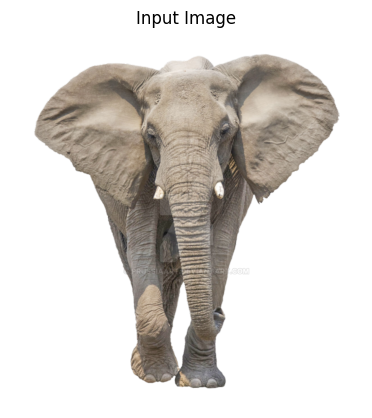

In [7]:
from PIL import Image
from transformers import pipeline
import requests
import io
import matplotlib.pyplot as plt


vqa_pipeline = pipeline(
    "visual-question-answering", model="Salesforce/blip-vqa-capfilt-large"
)

url = "https://www.freepnglogos.com/uploads/elephant-png/african-elephant-transparent-background-18.png"
response = requests.get(url, stream=True)
response.raise_for_status()  # Raise an exception for HTTP errors
image = Image.open(io.BytesIO(response.content))
# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Input Image")
plt.axis('off')
question = "Is there an elephant?"

vqa_pipeline(image, question, top_k=5)

**Deplot**: It is a one-shot visual language reasoning model trained on translating plots and charts to text summaries. This enables its integration with LLMs for answering complex questions about the data, even with novel human-written queries. DePlot achieves this by standardizing the plot-to-table translation task and leveraging Pix2Struct architecture, surpassing previous SOTA on chart QA with just a single example and LLM prompting. You can use the Deplot in huggingface as follows:

Entity | Individuals responsibility | Government's responsibility <0x0A> MEDIAN | 39.0 | 55.0 <0x0A> Germany | nan | 35.0 <0x0A> UK | 45.0 | 49.0 <0x0A> Sweden | 37.0 | 53.0 <0x0A> Denmark | 42.0 | 54.0 <0x0A> France | 38.0 | 55.0 <0x0A> Netherla nns | 40.0 | 58.0 <0x0A> Spain | 29.0 | 63.0 <0x0A> Italy | 22.0 | 74.0


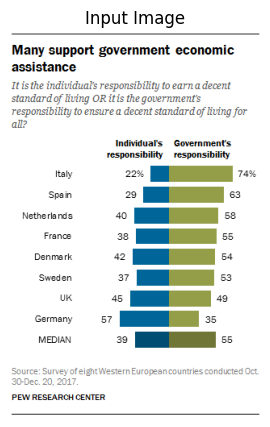

In [8]:
from transformers import Pix2StructProcessor, Pix2StructForConditionalGeneration
import requests
from PIL import Image
import matplotlib.pyplot as plt


processor = Pix2StructProcessor.from_pretrained("google/deplot")
model = Pix2StructForConditionalGeneration.from_pretrained("google/deplot")

url = "https://raw.githubusercontent.com/vis-nlp/ChartQA/main/ChartQA%20Dataset/val/png/5090.png"
image = Image.open(requests.get(url, stream=True).raw)

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Input Image")
plt.axis('off')


inputs = processor(
    images=image,
    text="Generate underlying data table of the figure below:",
    return_tensors="pt",
)
predictions = model.generate(**inputs, max_new_tokens=512)
print(processor.decode(predictions[0], skip_special_tokens=True))

**VLIT**: It is a Vision-and-Language Transformer (ViLT) model, utilizing a transformer architecture without convolutions or region supervision, fine-tuned on the VQAv2 dataset for answering natural language questions about images. The base ViLT model boasts a large architecture (B32 size) and leverages joint image and text training, making it effective for various vision-language tasks, particularly VQA, achieving competitive performance.

Predicted answer: 2


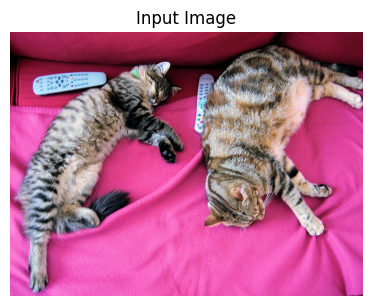

In [9]:
from transformers import ViltProcessor, ViltForQuestionAnswering
import requests
from PIL import Image
import matplotlib.pyplot as plt


# prepare image + question
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Input Image")
plt.axis('off')

text = "How many cats are there?"

processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

# prepare inputs
encoding = processor(image, text, return_tensors="pt")

# forward pass
outputs = model(**encoding)
logits = outputs.logits
idx = logits.argmax(-1).item()
print("Predicted answer:", model.config.id2label[idx])

### Document Question Answering

In [2]:
!pip install sentencepiece
!pip install pytesseract
!pip install protobuf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.7 MB/s eta 0:00:00


**LayoutLM**: It is a pre-trained neural network that understands document images by jointly analyzing both the text and its layout. Unlike traditional NLP models, it considers factors like font size, position, and proximity to learn relationships between words and their meaning in the context of the document. This allows it to excel at tasks like form understanding, receipt analysis, and document classification, making it a powerful tool for extracting information from scanned documents.

Device set to use mps:0


[{'score': 0.9904012680053711, 'answer': 'CHF', 'start': 20, 'end': 20}]

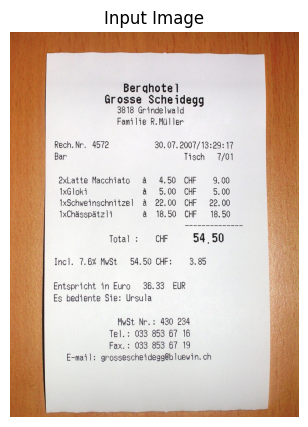

In [2]:
from transformers import pipeline
import requests
from PIL import Image
import matplotlib.pyplot as plt

pipe = pipeline("document-question-answering", model="impira/layoutlm-document-qa")

question = "What is the total amount?"
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/ReceiptSwiss.jpg/960px-ReceiptSwiss.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Input Image")
plt.axis('off')

pipe(image=image, question=question)

**Donut**: Also known as OCR-free Document Understanding Transformer, is a state-of-the-art image processing model that bypasses traditional optical character recognition (OCR) and directly analyzes document images to understand their content. It combines a vision encoder (Swin Transformer) with a text decoder (BART) to extract information and generate textual descriptions, excelling in tasks like document classification, form understanding, and visual question answering. Its unique strength lies in its “end-to-end” nature, avoiding potential errors introduced by separate OCR steps and achieving impressive accuracy with efficient processing.

Device set to use mps:0


[{'answer': '033 853 67 19'}]

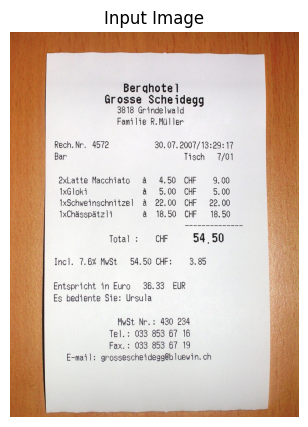

In [ ]:
from transformers import pipeline
import requests
from PIL import Image
import matplotlib.pyplot as plt

pipe = pipeline(
    "document-question-answering", model="naver-clova-ix/donut-base-finetuned-docvqa"
)

# question = "What is the purchase amount?"
question = "What is the total amount?"
# question = "What is the phone number?"
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/ReceiptSwiss.jpg/960px-ReceiptSwiss.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Input Image")
plt.axis('off')

pipe(image=image, question=question)

**Nougat**: It is a visual transformer model, trained on millions of academic papers, that can directly “read” scanned PDFs and output their content in a structured markup language, even understanding complex elements like math equations and tables. It bypasses traditional Optical Character Recognition, achieving high accuracy while preserving semantics, making scientific knowledge stored in PDFs more accessible and usable. Nougat uses the same architecture as Donut, meaning an image Transformer encoder and an autoregressive text Transformer decoder to translate scientific PDFs to markdown, enabling easier access to them.


In [2]:
!pip install python-Levenshtein
!pip install nltk

  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 32.7 MB/s eta 0:00:00
Using cached click-8.2.1-py3-none-any.whl (102 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [nltk]2/3 [nltk]


/opt/homebrew/anaconda3/envs/robo_paper_foundations/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.58.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


'\n\n# Nougat: Neural Optical Understanding for Academic Documents\n\n Lukas Blecher\n\nCorrespondence to: lblecher@'


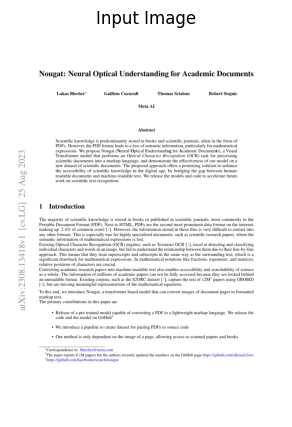

In [1]:
from huggingface_hub import hf_hub_download
import re
from PIL import Image

from transformers import NougatProcessor, VisionEncoderDecoderModel
from datasets import load_dataset
import torch
import matplotlib.pyplot as plt

processor = NougatProcessor.from_pretrained("facebook/nougat-base")
model = VisionEncoderDecoderModel.from_pretrained("facebook/nougat-base")

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
# prepare PDF image for the model
filepath = hf_hub_download(
    repo_id="hf-internal-testing/fixtures_docvqa",
    filename="nougat_paper.png",
    repo_type="dataset",
)
image = Image.open(filepath)

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Input Image")
plt.axis('off')

pixel_values = processor(image, return_tensors="pt").pixel_values

# generate transcription (here we only generate 30 tokens)
outputs = model.generate(
    pixel_values.to(device),
    min_length=1,
    max_new_tokens=30,
    bad_words_ids=[[processor.tokenizer.unk_token_id]],
)

sequence = processor.batch_decode(outputs, skip_special_tokens=True)[0]
sequence = processor.post_process_generation(sequence, fix_markdown=False)
# note: we're using repr here such for the sake of printing the \n characters, feel free to just print the sequence
print(repr(sequence))